In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
zomato_df = pd.read_csv("/content/Zomato data .csv")

Convert the 'rate' column to float

In [ ]:
def handleRate(value):
  value = str(value).split('/')[0]
  return float(value)

In [ ]:
zomato_df['rate'] = zomato_df['rate'].apply(handleRate)

In [ ]:
zomato_df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Get Details of the dataframe

In [ ]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Count plot for types of restaurants

Text(0.5, 0, 'Types of Restaurants')

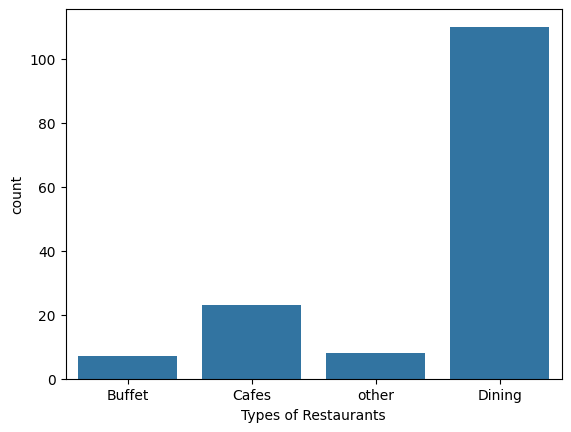

In [ ]:
sns.countplot(x=zomato_df['listed_in(type)'])
plt.xlabel('Types of Restaurants')

Votes for each type of restaurant

In [ ]:
# Get the numer of votes for each type of restaurant
grouped_data = zomato_df.groupby('listed_in(type)')['votes'].sum()
print(grouped_data)

listed_in(type)
Buffet     3028
Cafes      6434
Dining    20363
other      9367
Name: votes, dtype: int64




*   Dining has Max Votes
*   Buffet has Min Votes



In [ ]:
# Storing the votes in a 'res' dataframe
res = pd.DataFrame({'votes': grouped_data})
print(res)

                 votes
listed_in(type)       
Buffet            3028
Cafes             6434
Dining           20363
other             9367


Plotting the Dataframe for votes

Text(0, 0.5, 'Votes')

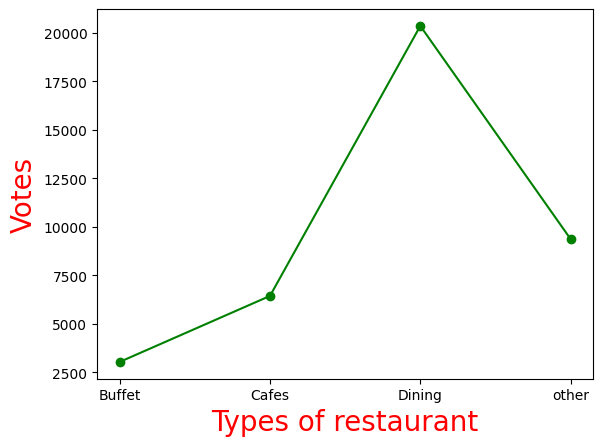

In [ ]:
# Plotting
plt.plot(res, c='green', marker="o")
plt.xlabel("Types of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)

Determining the Restaurant's name that received the max votes

In [39]:
# Find max no. of votes in the dataframe
maxVotes = zomato_df['votes'].max()
print(maxVotes)

4884


In [43]:
# Find the name of the restaurant with max votes
zomato_df.loc[zomato_df['votes'] == maxVotes]['name']

,name
38,Empire Restaurant


Count plot for online order

Text(0.5, 0, 'Online order')

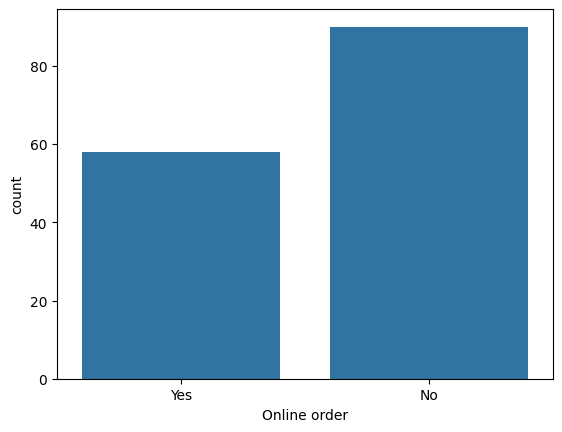

In [53]:
sns.countplot(x='online_order', data=zomato_df)
plt.xlabel("Online order")

The plot above suggests that majority restaurants do not accept online orders

Check the Ratings

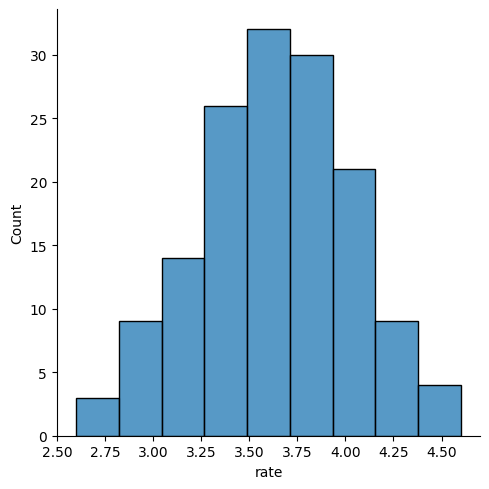

In [52]:
sns.displot(x='rate', data=zomato_df)

The plot above suggests that majority restaurants received ratings between 3.50 and 3.75

Plot for 'Cost'

Text(0.5, 0, 'Cost for two (approx.)')

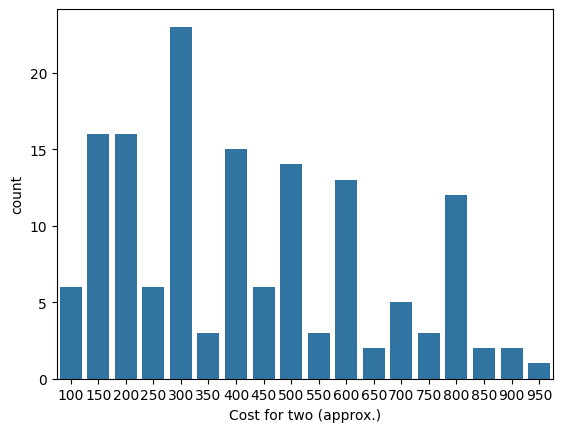

In [51]:
sns.countplot(x='approx_cost(for two people)', data=zomato_df)
plt.xlabel("Cost for two (approx.)")

Higher Ratings : Online VS Offline

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='online_order', ylabel='rate'>

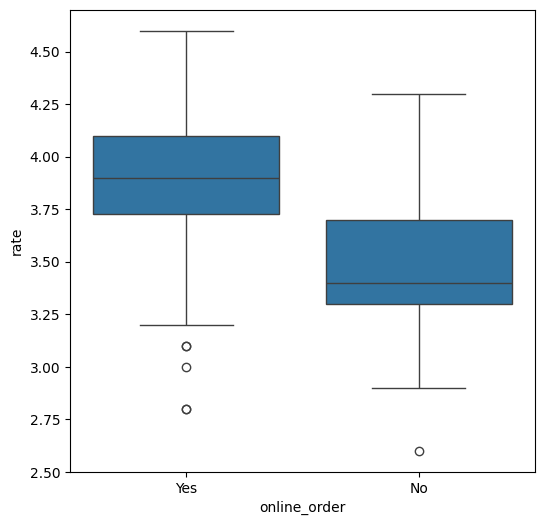

In [50]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=zomato_df)

The plot above suggests that offline orders received lower ratings than online orders

Heat map for 'Online orders' and 'Restaurant types'

In [54]:
pivot_table = zomato_df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
print(pivot_table)

online_order     No  Yes
listed_in(type)         
Buffet            3    4
Cafes             8   15
Dining           77   33
other             2    6


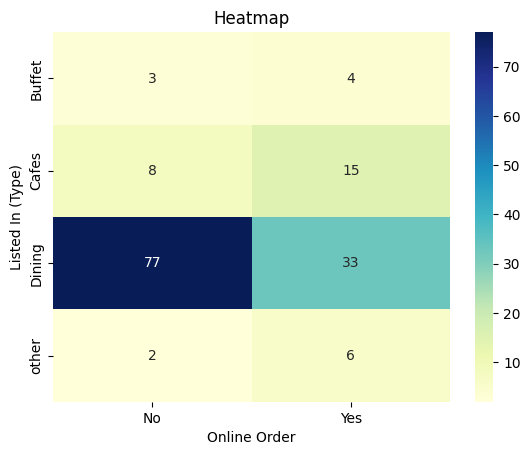

In [57]:
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

The plot above suggests that Dining restaurants accept 'OFFLINE' orders more and Cafes accept 'ONLINE' orders more. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.